In [1]:
import os
from itertools import product
import config
import json
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
get_model_name = lambda dataset, model_type, curriculum: os.path.join(dataset + ("_" + model_type) + "_" + curriculum.split(".")[0])
import util

In [2]:
get_model_name = lambda dataset, model_type, curriculum: os.path.join(dataset + ("_" + model_type) + "_" + curriculum.split(".")[0])

jobs =[(get_model_name(dataset, model_type, curriculum), dataset, model_type, curriculum) for dataset, model_type, curriculum in product(config.datasets, config.model_types, config.baseline_curricula)]
jobs.extend([(get_model_name(dataset, model_type, model_type + curriculum), dataset, model_type, model_type + curriculum) for dataset, model_type, curriculum  in (product(config.datasets, config.model_types, config.influence_curricula))])
# jobs.extend([(model_name, "external", model_type, "external") for model_name, model_type in config.baseline_models])
print("len jobs", len(jobs))
def get_df(model, dataset, model_type, curriculum):

    blimp_out_path = f"./eval/blimp/{os.path.basename(model)}/blimp_results.json"



    df = None
    try:
        with open(blimp_out_path) as f:
            d = json.load(f)

    except:
        print("skipping", blimp_out_path, "not found")
        return None

    df = pd.DataFrame(d["results"]).T

    df.index.name="metric"
    df = df.drop("alias", axis=1)
    df.columns = [col.replace(',none', '').replace("acc_stderr", "std") for col in df.columns]
    df = df.loc[~df.index.isin(["blimp_supplement", "blimp_filtered"]),:]
    df[["model", "dataset", "model_type", "curriculum"]] = model, dataset, model_type, curriculum
    return df

df = pd.concat((get_df(*job) for job in jobs))
df

len jobs 84


,acc,std,model,dataset,model_type,curriculum
metric,,,,,,
blimp_supplement_hypernym,0.488124,0.017237,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_easy,0.59375,0.061877,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_qa_congruence_tricky,0.315152,0.036277,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_subject_aux_inversion,0.625291,0.007785,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
blimp_supplement_turn_taking,0.471429,0.029885,loris3/babylm_2024_10m_curriculum_llama_random,loris3/babylm_2024_10m_curriculum,llama,random.pt
...,...,...,...,...,...,...
blimp_wh_questions_subject_gap_long_distance_filtered,0.350058,0.016303,loris3/stratified_10m_curriculum_roberta_roberta_influence_tracin_sandwich,loris3/stratified_10m_curriculum,roberta,roberta_influence_tracin_sandwich.pt
blimp_wh_vs_that_no_gap_filtered,0.399535,0.016702,loris3/stratified_10m_curriculum_roberta_roberta_influence_tracin_sandwich,loris3/stratified_10m_curriculum,roberta,roberta_influence_tracin_sandwich.pt
blimp_wh_vs_that_no_gap_long_distance_filtered,0.957714,0.006807,loris3/stratified_10m_curriculum_roberta_roberta_influence_tracin_sandwich,loris3/stratified_10m_curriculum,roberta,roberta_influence_tracin_sandwich.pt


In [3]:
import warnings


warnings.filterwarnings("ignore", message=".*The palette list has more values.*")


warnings.filterwarnings("ignore", message=".*set_ticklabels\\(\\) should only be used.*")

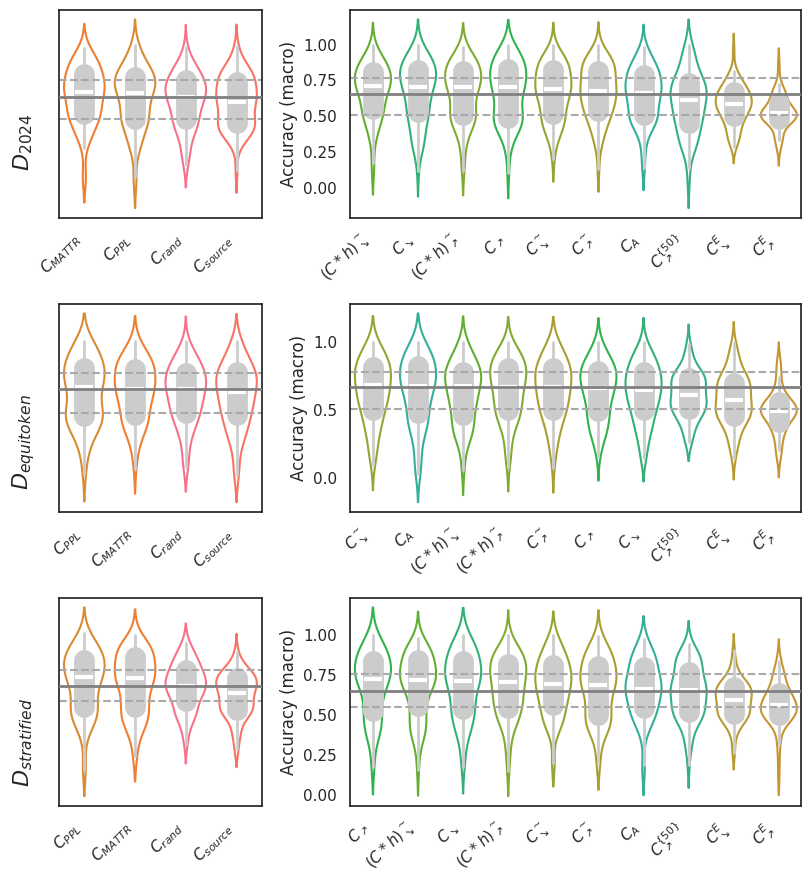

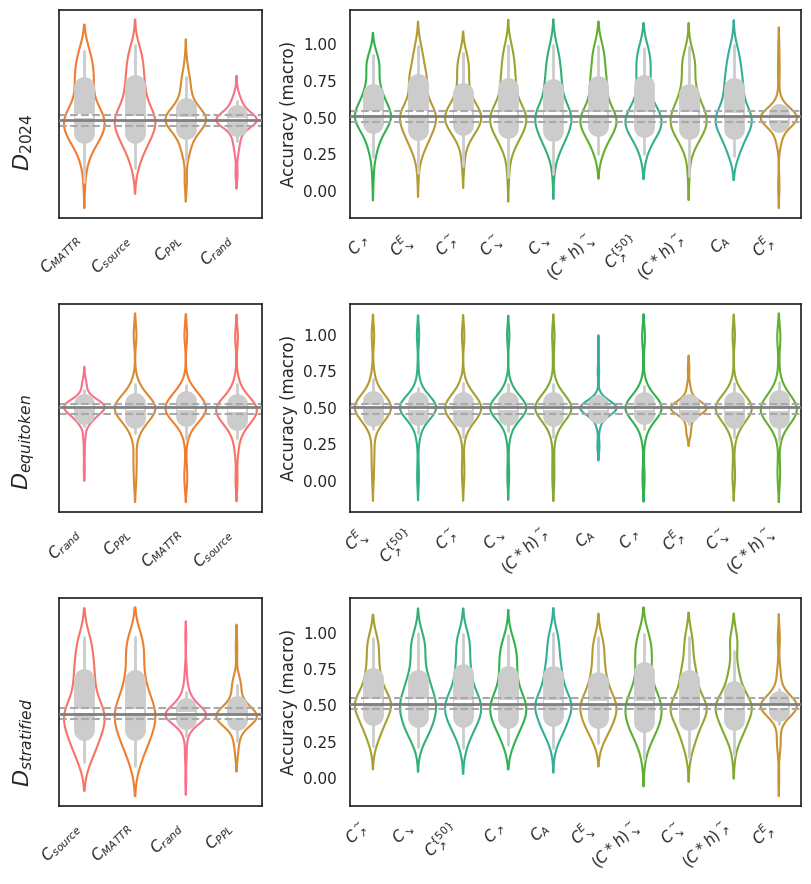

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import numpy as np
for model_type in config.model_types:
        
        df["plot_group"] = df["curriculum"].str.contains("influence")
        WIDTH_TWO_COL = 8.04

        sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

        n_rows = len(config.datasets) 
        n_cols = 2 
        fig = plt.figure(figsize=(WIDTH_TWO_COL, 3 * n_rows))

        gs = GridSpec(n_rows, 2, figure=fig, width_ratios=[0.45, 1]) 


        all_plotted_models = set()

        temp_df = df[df["model"].str.contains("|".join(config.datasets))] 
        for baseline_dataset in config.datasets:
                model_data_pre = temp_df[temp_df["model"].str.contains(baseline_dataset)]
                for plot_group in model_data_pre["plot_group"].unique():
                        group_data_pre = model_data_pre[model_data_pre["plot_group"] == plot_group]
                        
                        model_medians_index = group_data_pre.groupby("model")["acc"].median().sort_values(ascending=False).index
                        all_plotted_models.update(model_medians_index)

        unique_model_list = sorted(list(all_plotted_models))
        num_unique_models = len(df[df["dataset"] ==df["dataset"].unique()[0]]["model"].unique())
        global_palette = sns.color_palette("husl", n_colors=num_unique_models)




        n_baseline_curricula = len(df[df["plot_group"] == False]["curriculum"].unique())
        axes = [[None for _ in range(n_cols)] for _ in range(n_rows)] 


        for i, baseline_dataset in enumerate(config.datasets):
 
                model_data = df[(df["model"].str.contains(baseline_dataset) & (df["model_type"] == model_type)) | (df["model"].str.contains("gpt") if model_type =="roberta" else df["model"].str.contains("baby-llama"))]
            
                
                col_idx = 0
                plot_groups_in_data = model_data["plot_group"].unique()

                for is_baseline_half in plot_groups_in_data:

                        axes[i][col_idx] = fig.add_subplot(gs[i, col_idx])
                        ax = axes[i][col_idx]

                        
                        group_data = model_data[model_data["plot_group"] == is_baseline_half]

                        
                        model_medians = group_data.groupby("model")["acc"].median().sort_values(ascending=False).index


                        sns.violinplot(data=group_data,
                                        x="model", y="acc",
                                        ax=ax,
                                        hue="curriculum",
                                        fill=False,             
                                        palette=global_palette[n_baseline_curricula:] if is_baseline_half else global_palette, 
                                        order=model_medians,
                                        inner_kws=dict(box_width=15, whis_width=2, color=".8"),
                                        legend=False           
                                        )

                        # Custom X-tick label formatting
                        current_xticklabels = ax.get_xticklabels()
                        new_xticklabels = [util.rename_model(label.get_text()) for label in current_xticklabels]
                        ax.set_xticklabels(new_xticklabels, rotation=45, ha="right")

                
                        random_model_name = f"{baseline_dataset}_{model_type}_random"
                        if random_model_name in df["model"].unique():
                                random_acc = df[df["model"] == random_model_name]["acc"]
                                if not random_acc.empty:
                                        ax.axhline(random_acc.median(), ls='-', zorder=10, linewidth=2, color="gray")
                                        ax.axhline(random_acc.quantile(0.25), ls='--', color="darkgrey") 
                                        ax.axhline(random_acc.quantile(0.75), ls='--', color="darkgrey") 

                        
                        if ax.get_legend() is not None:
                                ax.get_legend().remove()

                        ax.set_title("") 
                        ax.set_xlabel("")


                        if not is_baseline_half:
                                ax.set_ylabel("")
                                ax.set_yticks([])

                        else:
                                ax.set_ylabel("")
                                ax.set_ylabel("Accuracy (macro)")



                        col_idx += 1 

        
                fig.text(0.01, (n_rows - 1 - i + 0.5) / n_rows,
                        util.rename_dataset(baseline_dataset),
                        ha="center",
                        va="center",
                        fontsize=16,
                        rotation=90,
                        fontweight="heavy")


        plt.tight_layout() 

        util.save_pdf(fig, "violin_plots_"+model_type)
        plt.show()

In [5]:
def get_random_baseline(x):
    x = os.path.basename(x)
    dataset = None
    for d in config.datasets:
        if os.path.basename(d) in x:
            dataset = d
    model_type = None
    for m in config.model_types:

        if os.path.basename(m) in x:
            model_type = m
    if dataset is None or model_type is None:
        return "external"    
    else:
        return df[df["model"].str.contains(os.path.basename(dataset)+"_"+os.path.basename(model_type)+"_random")]["model"].iloc[0]
 
def get_source_difficulty_baseline(x):
    x = os.path.basename(x)
    dataset = None
    for d in config.datasets:
        if os.path.basename(d) in x:
            dataset = d
    model_type = None
    for m in config.model_types:

        if os.path.basename(m) in x:
            model_type = m
    if dataset is None or model_type is None:
        return "external"    
    else:
        return df[df["model"].str.contains(os.path.basename(dataset)+"_"+os.path.basename(model_type)+"_source_difficulty")]["model"].iloc[0]
 

In [6]:
def get_model_type(x):
    if "roberta" in x: 
        return "RoBERTa"
    if "llama" in x :
        return "Llama"
    if "gpt-bert" in x:
        return "gpt-bert"
    print("f", x)

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
models = df["model"].unique()


results = []

for model in models:
    random_acc = pd.to_numeric(df[df["model"] == get_random_baseline(model)]["acc"])
    source_model_acc = pd.to_numeric(df[df["model"] == get_source_difficulty_baseline(model)]["acc"])
    model_acc = pd.to_numeric(df[df["model"] == model]["acc"])

    t_stat, p_val = np.nan, np.nan
    if "external" not in get_random_baseline(model):
        t_stat, p_val = stats.ttest_rel(model_acc, random_acc,alternative="two-sided")

       
    avg_improvement = (model_acc - random_acc).mean() *100
    average_improvement_source_difficulty = (model_acc-source_model_acc).mean() *100
    results.append((model, model_acc.mean(), random_acc.mean() if not "rand" in model else "-", p_val, avg_improvement if not "external" in model else "-", p_val < 0.05,average_improvement_source_difficulty if not "external" in model else "-"))

results_df = pd.DataFrame(results, columns=["model","model_acc", "random_acc","p_value","average_improvement", "significant","average_improvement_source_difficulty"])

table = results_df.sort_values(by="average_improvement")
def format_with_significance(row):
    
    val = f"{row['average_improvement']:+.2f}\%"
    if row['p_value'] < 0.01:
        val += "***"
    elif row['p_value'] < 0.05:
        val += "**"
    elif row['p_value'] < 0.1:
        val += "*"

    return val if "nan" not in val else "-"


table["formatted_improvement"] = table.apply(format_with_significance, axis=1)

table["dataset"] = table["model"].apply(lambda x: util.rename_dataset(util.get_dataset(x)))
table["curriculum"] = table["model"].apply(lambda x: util.rename(util.get_curriculum_name(x)))
table["model_type"] = table["model"].apply(get_model_type)
table["model"] = table["model"].apply(util.rename_model)




baseline = table[table["curriculum"].isin(["external", "$C_{rand}$"])].sort_values(by="model_acc")
others = table[~table["curriculum"].isin(["external", "$C_{rand}$"])]


ordered_table = pd.concat([baseline, others])



result = ordered_table[["model", "dataset", "model_type", "formatted_improvement", "p_value", "model_acc", "random_acc"]]

result = result.rename(columns={
    "formatted_improvement" : "Improvement",
    "model" : "Curriculum",
    "dataset" : "Dataset",
    "model_type": "Architecture",
    "p_value" : "p-val",
    "model_acc" : "Model acc",
    "random_acc" : "Random acc"
    })

result = result.fillna("-")
latex_code = result.to_latex(index=False, escape=False,float_format="%.3f",multirow=False,longtable=True,caption="Macro-average gain in accuracy over the corresponding random curricula.")
latex_lines = latex_code.split("\n")


last_baseline_idx = len(baseline) 


line_to_insert_after = last_baseline_idx + 17 


latex_lines.insert(line_to_insert_after, "\\hline \\hline")

latex_code_with_double_line = "\n".join(latex_lines)

with open("./autogenerated_figures/tabular_full_benchmark_results.tex", "w") as f:
    f.write(latex_code_with_double_line)

In [8]:
table.to_pickle("./plotting_notebooks/cache/benchmark_results.pkl")

In [9]:
out = pd.DataFrame(table.groupby("curriculum")["average_improvement"].mean().sort_values()).rename(columns={
    "average_improvement" : "Improvement",
    "model" : "Curriculum",
    "dataset" : "Dataset",
    "model_type": "Architecture",
    "p_value" : "p-val",
    "model_acc" : "Model acc",
    "random_acc" : "Random acc"
    }).to_latex(index=True, escape=False,float_format="%.3f",multirow=False)
with open("./autogenerated_figures/tabular_aggregated_results_curricula_level.tex", "w") as f:
    f.write(out)

In [10]:
out = pd.DataFrame(table.groupby(["model_type","curriculum"])["average_improvement"].mean().sort_values()).reset_index().rename(columns={
    "average_improvement" : "Improvement",
    "model" : "Curriculum",
    "dataset" : "Dataset",
    "model_type": "Architecture",
    "p_value" : "p-val",
    "model_acc" : "Model acc",
    "model_type" : "Type",
    "random_acc" : "Random acc"
    }).to_latex(index=False, escape=False,float_format="%.3f",multirow=False)
with open("./autogenerated_figures/tabular_per_model_type.tex", "w") as f:
    f.write(out)

In [11]:
out = pd.DataFrame(
    table[table["curriculum"] == "$C_{rand}$"]
    .set_index(["dataset","model_type"])["model_acc"]
    .sort_values()
    .unstack(level="model_type")  # This brings model types side by side
    .reset_index()
    .rename(columns={
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "RoBERTa": "$C_{rand}$ acc RoBERTa",
        "Llama": "$C_{rand}$ acc Llama"
    })
).sort_values(by="$C_{rand}$ acc RoBERTa").to_latex(index=False, escape=False,float_format="%.3f",multirow=False,longtable=False)
with open("./autogenerated_figures/tabular_random_curricula.tex", "w") as f:
    f.write(out)

In [12]:
out = pd.DataFrame(table.sort_values(by="average_improvement_source_difficulty").set_index(["dataset","model_type","curriculum"])["average_improvement_source_difficulty"].sort_values()
.reset_index()
    .rename(columns={
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "model_type": "Type",
        "average_improvement_source_difficulty": "Average Improvement vs. $C_{source}$"
    })
).to_latex(index=False, escape=False,float_format="%.3f",multirow=False,longtable=True)
with open("./autogenerated_figures/tabular_vs_source.tex", "w") as f:
    f.write(out)

In [13]:
out = pd.DataFrame(
    table[table["curriculum"] == "$C_{rand}$"]
    .set_index(["dataset","model_type"])["model_acc"]
    .sort_values()
    .unstack(level="model_type")  # This brings model types side by side
    .reset_index()
    .rename(columns={
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "RoBERTa": "$C_{rand}$ acc RoBERTa",
        "Llama": "$C_{rand}$ acc Llama"
    })
).sort_values(by="$C_{rand}$ acc RoBERTa").to_latex(index=False, escape=False,float_format="%.3f",multirow=False,longtable=False)
with open("./autogenerated_figures/tabular_random_curricula.tex", "w") as f:
    f.write(out)

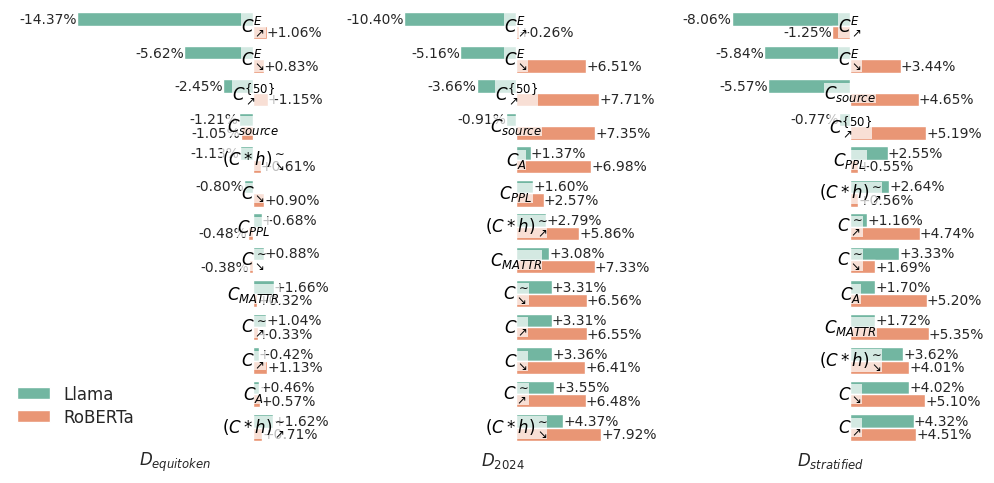

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


datasets = table["dataset"].unique()

# 
sns.set_palette("Set2")
fig, axes = plt.subplots(1, 3, figsize=(10, 5),)

for ax,dataset in zip(axes,datasets):


    df = pd.DataFrame(
        table[
            (table["curriculum"] != "$C_{rand}$") &
            (table["dataset"] == dataset)
        ].groupby(["model_type", "curriculum"])["average_improvement"].mean().sort_values()
    ).reset_index().rename(columns={
        "average_improvement": "Improvement",
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "model_type": "Architecture",
        "p_value": "p-val",
        "model_acc": "Model acc",
        "model_type": "Type",
        "random_acc": "Random acc"
    })

    sns.barplot(
        data=df,
        x="Improvement",
        y="Curriculum",
        hue="Type",
        ax=ax
    )

    # Add curriculum labels
    curricula = [label.get_text() for label in ax.get_yticklabels()]
    for i, curriculum in enumerate(curricula):
        ax.text(0, i, curriculum, ha='center', va='center', fontsize=12, fontweight='bold', color='black', zorder=4,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle=f"square,pad={0}", alpha=0.7,),
        )

    # Add value labels to bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%+.2f%%')

    ax.set_yticks([])
    ax.set_xticks([])

    ax.set_xlabel(dataset)
    ax.set_ylabel("")

    if ax.get_legend():
        ax.get_legend().remove()

    sns.despine(left=True, right=True, top=True, bottom=True)
    plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0,0.10), frameon=False,
           facecolor='white', fontsize=12, markerscale=0.5, labelspacing=0.3)



util.save_pdf(fig, "accuracy_delta_per_curriculum_and_dataset")
plt.show()


In [15]:
table["group"] = table["model"].apply(lambda x: (1 if "searrow" in x else -1) if ("arrow" in x) and ("E" not in x) and ("A" not in x) and ("50" not in x) and ("*" not in x) else 0)

In [16]:
table["group"] = table["model"].apply(lambda x: (1 if "searrow" in x else -1) if ("arrow" in x) and ("E" not in x) and ("A" not in x) and ("50" not in x) and ("*" not in x) else 0)


In [17]:
from scipy.stats import ttest_ind

for (model_type,dataset, curriculum), df in table.groupby([ "model_type","dataset","curriculum"]):
    print(model_type, dataset)


Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{2024}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{equitoken}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
Llama $D_{stratified}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$
RoBERTa $D_{2024}$

In [18]:
from scipy.stats import ttest_ind

for (model_type), df in table.groupby([ "model_type","dataset"]):
    g1 = df[df["group"] != 1]["model_acc"]
    g_1 = df[df["group"] == -1]["model_acc"]
    t, p = ttest_ind(g1, g_1, equal_var=False,alternative="less")
    
    print(f"{dataset} | {model_type} | t={t:.2f} p={p:.4g}")


$D_{stratified}$ | ('Llama', '$D_{2024}$') | t=-2.69 p=0.01039
$D_{stratified}$ | ('Llama', '$D_{equitoken}$') | t=-1.72 p=0.05575
$D_{stratified}$ | ('Llama', '$D_{stratified}$') | t=-1.50 p=0.1272
$D_{stratified}$ | ('RoBERTa', '$D_{2024}$') | t=-1.28 p=0.1129
$D_{stratified}$ | ('RoBERTa', '$D_{equitoken}$') | t=-0.68 p=0.2937
$D_{stratified}$ | ('RoBERTa', '$D_{stratified}$') | t=-2.20 p=0.02453


In [19]:
from scipy.stats import ttest_ind

for (model_type), df in table.groupby([ "model_type","dataset"]):
    g1 = df[df["group"] != 0]["model_acc"]
    g_1 = df[df["group"] == 0]["model_acc"]
    t, p = ttest_ind(g1, g_1, equal_var=False,alternative="greater")
    
    print(f"{dataset} | {model_type} | t={t:.2f} p={p:.4g}")


$D_{stratified}$ | ('Llama', '$D_{2024}$') | t=2.84 p=0.009684
$D_{stratified}$ | ('Llama', '$D_{equitoken}$') | t=1.53 p=0.07877
$D_{stratified}$ | ('Llama', '$D_{stratified}$') | t=2.67 p=0.01021
$D_{stratified}$ | ('RoBERTa', '$D_{2024}$') | t=1.28 p=0.1168
$D_{stratified}$ | ('RoBERTa', '$D_{equitoken}$') | t=0.30 p=0.3865
$D_{stratified}$ | ('RoBERTa', '$D_{stratified}$') | t=1.11 p=0.1478


In [20]:
table["y"] = table["model_acc"] / pd.to_numeric(table["random_acc"], errors='coerce')

/tmp/ipykernel_466511/1780831963.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "Llama"][
/tmp/ipykernel_466511/1780831963.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "Llama"][
/tmp/ipykernel_466511/1780831963.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "Llama"][


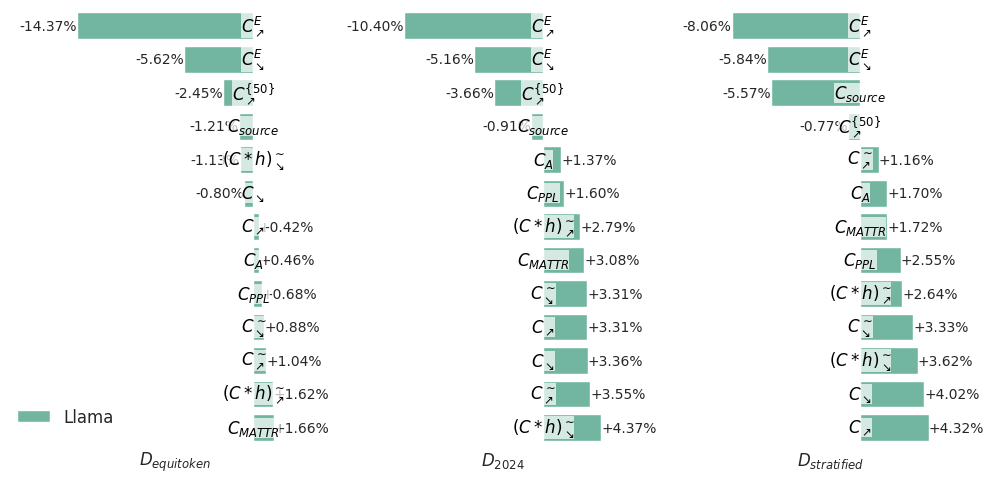

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


datasets = table["dataset"].unique()

# 
sns.set_palette("Set2")
fig, axes = plt.subplots(1, 3, figsize=(10, 5),)

for ax,dataset in zip(axes,datasets):


    df = pd.DataFrame(
        table[table["model_type"] == "Llama"][
            (table["curriculum"] != "$C_{rand}$") &
            (table["dataset"] == dataset)
        ].groupby(["model_type", "curriculum"])["average_improvement"].mean().sort_values()
    ).reset_index().rename(columns={
        "average_improvement": "Improvement",
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "model_type": "Architecture",
        "p_value": "p-val",
        "model_acc": "Model acc",
        "model_type": "Type",
        "random_acc": "Random acc"
    })

    sns.barplot(
        data=df,
        x="Improvement",
        y="Curriculum",
        hue="Type",
        ax=ax
    )

    # Add curriculum labels
    curricula = [label.get_text() for label in ax.get_yticklabels()]
    for i, curriculum in enumerate(curricula):
        ax.text(0, i, curriculum, ha='center', va='center', fontsize=12, fontweight='bold', color='black', zorder=4,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle=f"square,pad={0}", alpha=0.7,),
        )

    # Add value labels to bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%+.2f%%')

    ax.set_yticks([])
    ax.set_xticks([])

    ax.set_xlabel(dataset)
    ax.set_ylabel("")

    if ax.get_legend():
        ax.get_legend().remove()

    sns.despine(left=True, right=True, top=True, bottom=True)
    plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0,0.10), frameon=False,
           facecolor='white', fontsize=12, markerscale=0.5, labelspacing=0.3)




/tmp/ipykernel_466511/19688063.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "RoBERTa"][
/tmp/ipykernel_466511/19688063.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "RoBERTa"][
/tmp/ipykernel_466511/19688063.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table[table["model_type"] == "RoBERTa"][


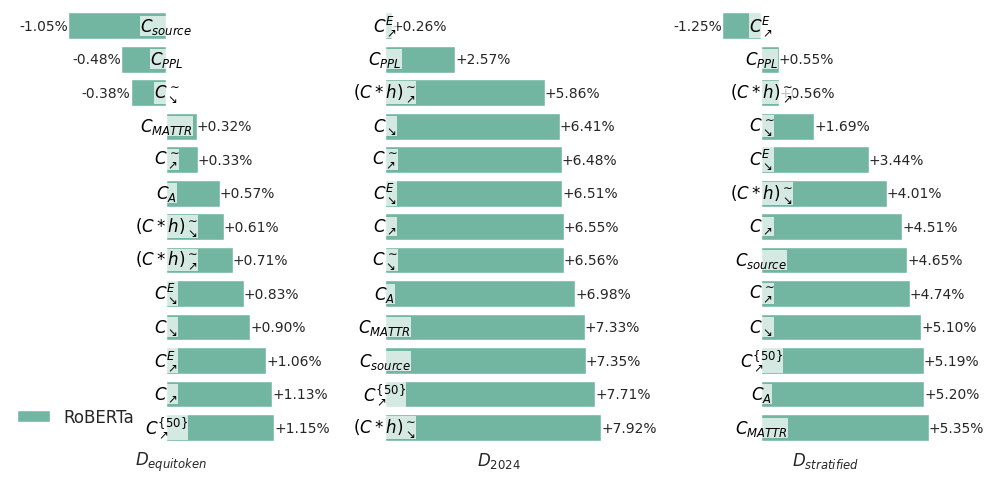

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


datasets = table["dataset"].unique()

# 
sns.set_palette("Set2")
fig, axes = plt.subplots(1, 3, figsize=(10, 5),)

for ax,dataset in zip(axes,datasets):


    df = pd.DataFrame(
        
        table[table["model_type"] == "RoBERTa"][
            (table["curriculum"] != "$C_{rand}$") &
            (table["dataset"] == dataset)
        ].groupby(["model_type", "curriculum"])["average_improvement"].mean().sort_values()
    ).reset_index().rename(columns={
        "average_improvement": "Improvement",
        "curriculum": "Curriculum",
        "dataset": "Dataset",
        "model_type": "Architecture",
        "p_value": "p-val",
        "model_acc": "Model acc",
        "model_type": "Type",
        "random_acc": "Random acc"
    })

    sns.barplot(
        data=df,
        x="Improvement",
        y="Curriculum",
        hue="Type",
        ax=ax
    )

    # Add curriculum labels
    curricula = [label.get_text() for label in ax.get_yticklabels()]
    for i, curriculum in enumerate(curricula):
        ax.text(0, i, curriculum, ha='center', va='center', fontsize=12, fontweight='bold', color='black', zorder=4,
            bbox=dict(facecolor='white', edgecolor='none', boxstyle=f"square,pad={0}", alpha=0.7,),
        )

    # Add value labels to bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fmt='%+.2f%%')

    ax.set_yticks([])
    ax.set_xticks([])

    ax.set_xlabel(dataset)
    ax.set_ylabel("")

    if ax.get_legend():
        ax.get_legend().remove()

    sns.despine(left=True, right=True, top=True, bottom=True)
    plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0,0.10), frameon=False,
           facecolor='white', fontsize=12, markerscale=0.5, labelspacing=0.3)




In [23]:
table.sort_values(by="model_acc")

,model,model_acc,random_acc,p_value,average_improvement,significant,average_improvement_source_difficulty,formatted_improvement,dataset,curriculum,model_type,group,y
13,$C_{source}$,0.479656,0.490155,0.611104,-1.049900,False,0.000000,-1.05\%,$D_{equitoken}$,$C_{source}$,RoBERTa,0,0.978580
15,$C_{PPL}$,0.485343,0.490155,0.817297,-0.481236,False,0.568665,-0.48\%,$D_{equitoken}$,$C_{PPL}$,RoBERTa,0,0.990182
57,$C^{\sim}_{\searrow}$,0.486339,0.490155,0.856354,-0.381657,False,0.668244,-0.38\%,$D_{equitoken}$,$C^{\sim}_{\searrow}$,RoBERTa,1,0.992214
44,$C^E_{\nearrow}$,0.486742,0.630457,0.000010,-14.371556,True,-13.158646,-14.37\%***,$D_{equitoken}$,$C^E_{\nearrow}$,Llama,0,0.772046
12,$C_{rand}$,0.490155,-,NaN,0.000000,False,1.049900,+0.00\%,$D_{equitoken}$,$C_{rand}$,RoBERTa,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,$(C*h)^{\sim}_{\searrow}$,0.674867,0.631135,0.000102,4.373165,True,5.282937,+4.37\%***,$D_{2024}$,$(C*h)^{\sim}_{\searrow}$,Llama,0,1.069290
67,$C^{\sim}_{\searrow}$,0.678183,0.644914,0.000676,3.326945,True,8.896810,+3.33\%***,$D_{stratified}$,$C^{\sim}_{\searrow}$,Llama,1,1.051587
69,$(C*h)^{\sim}_{\searrow}$,0.681135,0.644914,0.001709,3.622152,True,9.192017,+3.62\%***,$D_{stratified}$,$(C*h)^{\sim}_{\searrow}$,Llama,0,1.056165
71,$C_{\searrow}$,0.685155,0.644914,0.000142,4.024154,True,9.594019,+4.02\%***,$D_{stratified}$,$C_{\searrow}$,Llama,1,1.062398


In [24]:
# import config
# data = { # language aquisition: (human-likeness, model-likeness)

# "source_difficulty.pt": (5,1),
# "mattr_increasing.pt": (4,1),
# "perplexity_increasing.pt": (3,2),
# "_influence_epoch_repetition.pt": (4,2),
# "_influence_decr_cp_dirac.pt": (2,3),
# "_influence_decr_bins_lognorm.pt": (3,3),
# "_influence_decr_bins_dirac.pt": (3,3),
# "_influence_incr_bins_lognorm.pt": (3,3),
# "_influence_incr_bins_dirac.pt": (3,3),

# "_influence_top_50_cp_shuffled.pt": (3,2),
# "_influence_tracin_sandwich.pt": (4,1),

# "_influence_incr_cp_dirac.pt": (2,3),
# "random.pt": (1,5),


# }
# for c in config.baseline_curricula:
#     if c not in data:
#         print(c)

In [25]:
# table.groupby(["curriculum", "model_type"])["average_improvement"].mean().sort_values()

In [26]:
# table.groupby("dataset")["average_improvement"].mean().sort_values()

In [27]:
# table.groupby(["dataset"])["average_improvement"].mean().sort_values()